<a href="https://colab.research.google.com/github/nirajmg/networkLB/blob/main/nlb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
wrr = pd.read_csv('wrr.csv',names=['ip', 'response_time', 'algo_time'])
rr = pd.read_csv('rr.csv',names=['ip', 'response_time', 'algo_time'])
lrt = pd.read_csv('lrt.csv',names=['ip', 'response_time', 'algo_time'])
iph = pd.read_csv('iph.csv',names=['ip', 'response_time', 'algo_time'])

In [4]:
for df in [wrr,rr,lrt,iph]:
  df['response_time'] = df['response_time'].apply(lambda x: float(x[:-2]))
  df['algo_time'] = df['algo_time'].apply(lambda x: float(x[:-2]))    

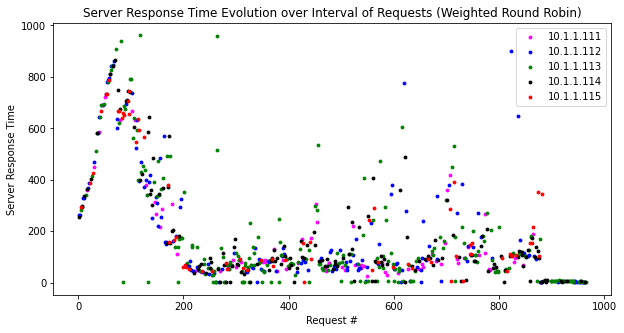

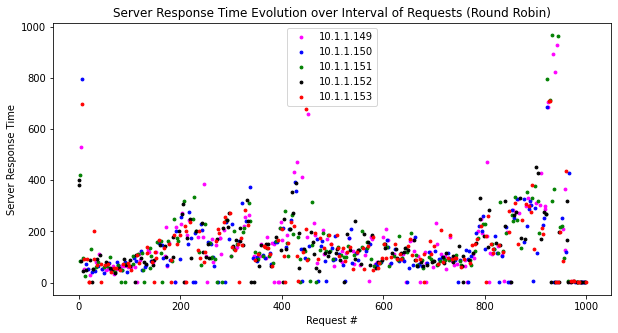

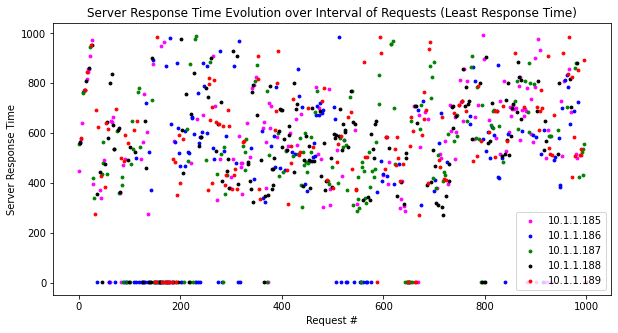

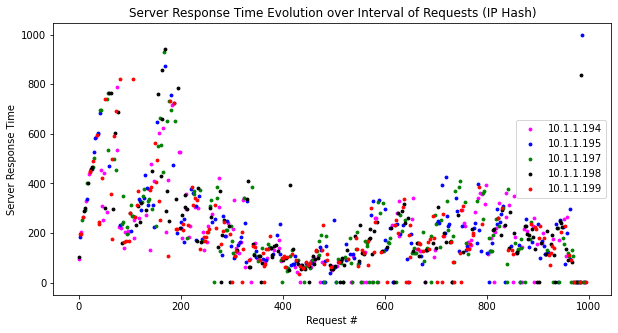

In [27]:
ptsize = 8
for i,df in enumerate([wrr,rr,lrt,iph]):
  if i==0:
    algo="Weighted Round Robin"
  elif i==1:
    algo="Round Robin"
  elif i==2:
    algo="Least Response Time"
  else:
    algo="IP Hash"

  ips = np.unique(df.ip)
  plt.figure(figsize=(10,5))
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[0],df.response_time), c='magenta', s=ptsize, label=ips[0])
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[1],df.response_time), c='blue', s=ptsize, label=ips[1])
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[2],df.response_time), c='green', s=ptsize, label=ips[2])
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[3],df.response_time), c='black', s=ptsize, label=ips[3])
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[4],df.response_time), c='red', s=ptsize, label=ips[4])
  plt.legend()
  plt.title('Server Response Time Evolution over Interval of Requests ({})'.format(algo))
  plt.ylabel('Server Response Time')
  plt.xlabel('Request #')
  plt.show()




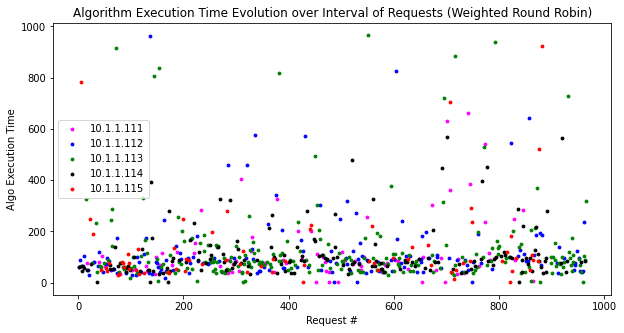

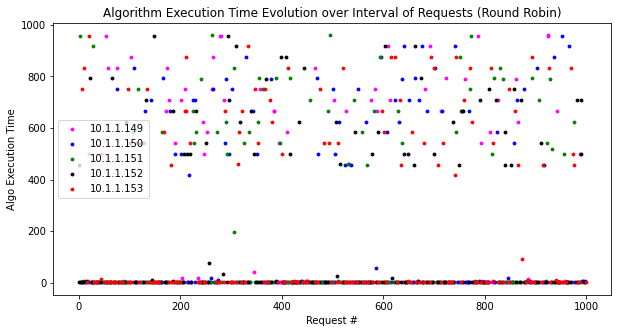

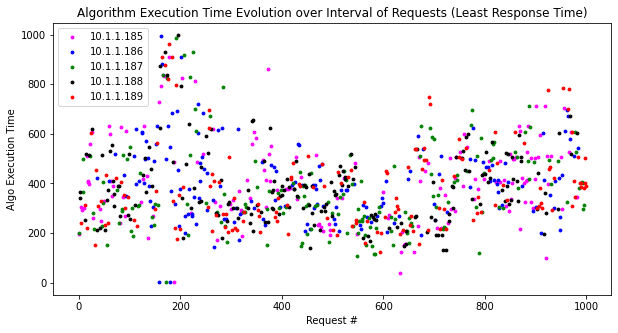

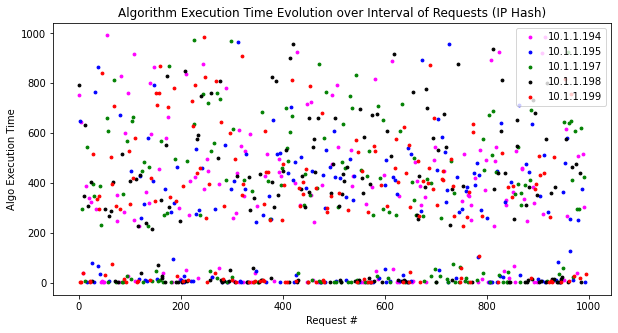

In [28]:
ptsize = 8
for i,df in enumerate([wrr,rr,lrt,iph]):
  if i==0:
    algo="Weighted Round Robin"
  elif i==1:
    algo="Round Robin"
  elif i==2:
    algo="Least Response Time"
  else:
    algo="IP Hash"

  ips = np.unique(df.ip)
  plt.figure(figsize=(10,5))
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[0],df.algo_time), c='magenta', s=ptsize, label=ips[0])
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[1],df.algo_time), c='blue', s=ptsize, label=ips[1])
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[2],df.algo_time), c='green', s=ptsize, label=ips[2])
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[3],df.algo_time), c='black', s=ptsize, label=ips[3])
  plt.scatter(df.index, np.ma.masked_where(df.ip != ips[4],df.algo_time), c='red', s=ptsize, label=ips[4])
  plt.legend()
  plt.title('Algorithm Execution Time Evolution over Interval of Requests ({})'.format(algo))
  plt.ylabel('Algo Execution Time')
  plt.xlabel('Request #')
  plt.show()

In [ ]:
for df in [wrr,rr,lrt,iph]:
  print(f'Number of successful calls for 1000 requests {len(df.index)}')

Number of successful calls for 1000 requests 967
Number of successful calls for 1000 requests 1000
Number of successful calls for 1000 requests 1000
Number of successful calls for 1000 requests 998


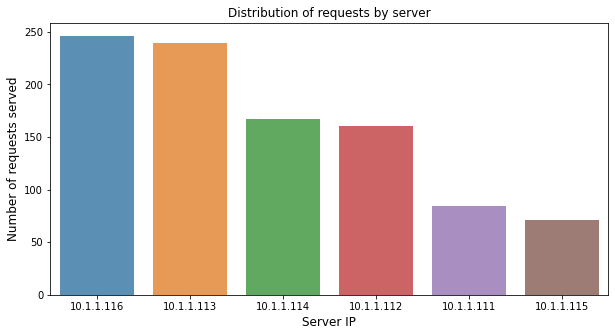

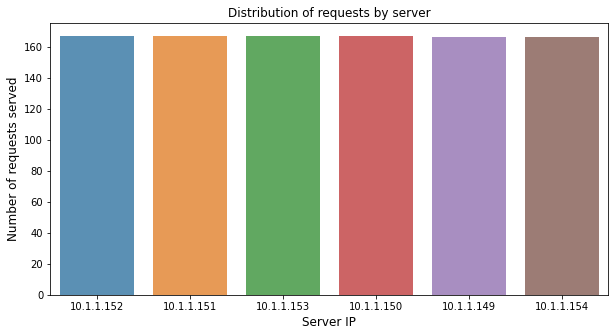

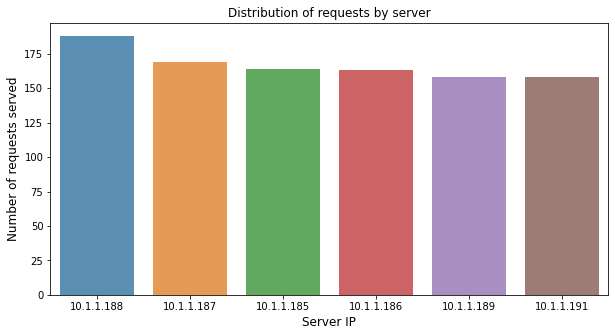

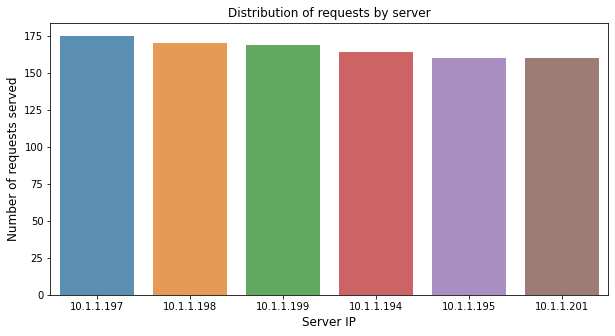

In [ ]:
for df in [wrr,rr,lrt,iph]:
  ip_count  = df['ip'].value_counts()
  plt.figure(figsize=(10,5))
  sns.barplot(ip_count.index, ip_count.values, alpha=0.8)
  plt.title('Distribution of requests by server')
  plt.ylabel('Number of requests served', fontsize=12)
  plt.xlabel('Server IP', fontsize=12)
  plt.show()



In [ ]:
#Average response time by algoritm
average_response_times = []
def printAvgTimePerAlgo(df):
  average_response_times.append(df['response_time'].mean())

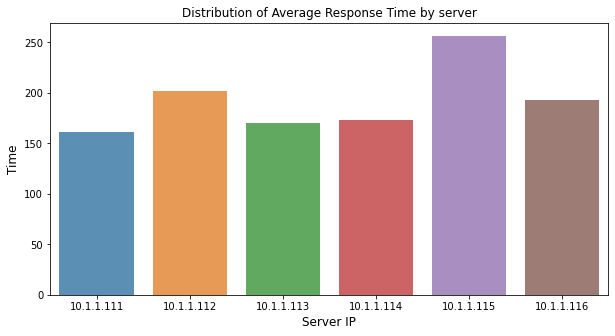

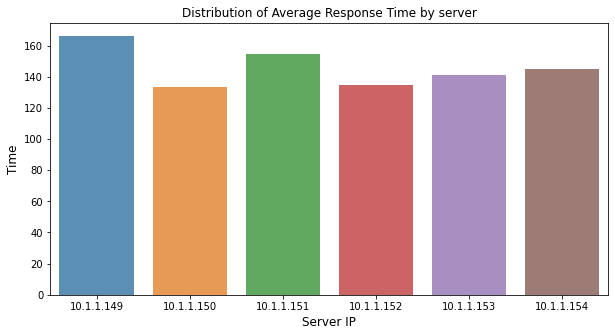

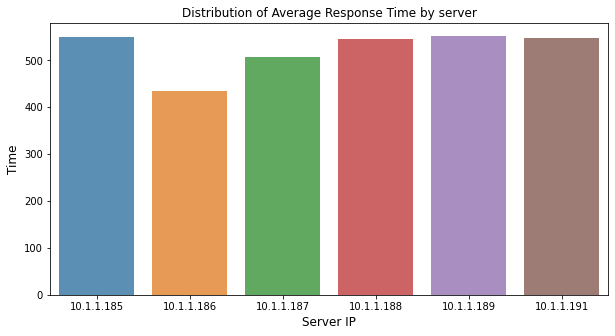

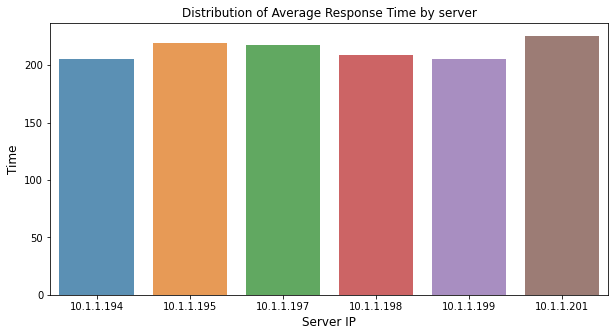

In [ ]:
for df in [wrr,rr,lrt,iph]:
  avg_time = df.groupby('ip').mean().reset_index()
  printAvgTimePerAlgo(avg_time)
  plt.figure(figsize=(10,5))
  sns.barplot(avg_time.ip, avg_time.response_time, alpha=0.8)
  plt.title('Distribution of Average Response Time by server')
  plt.ylabel('Time', fontsize=12)
  plt.xlabel('Server IP', fontsize=12)
  plt.show()

In [ ]:
avg_time

,ip,response_time,algo_time
0,10.1.1.111,160.983697,122.410394
1,10.1.1.112,201.857764,120.933227
2,10.1.1.113,170.561281,131.304513
3,10.1.1.114,173.173894,111.300959
4,10.1.1.115,256.318230,132.900481
5,10.1.1.116,192.811449,114.600870


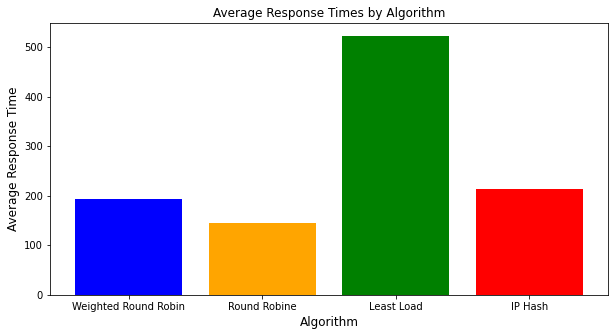

In [ ]:
algo_names = ["Weighted Round Robin", "Round Robine", "Least Load", "IP Hash"]
plt.figure(figsize=(10,5))
plt.bar(algo_names, average_response_times, color=['blue', 'orange', 'green', 'red'])
plt.title('Average Response Times by Algorithm')
plt.ylabel('Average Response Time', fontsize=12)
plt.xlabel('Algorithm', fontsize=12)
plt.show()

# TODO 
1. CPU memory for each server which is shown in the plot.  
2. distribution of requests by server.  
3. scatter plot to show how the algorithm switches between servers. 
4. Average response time. 
5. Average algorithm time.
6. scatter plot of how the response time increases or algo time  

%
Adding more servers
1. makefile helm, add more lines
2. Change algorithm: values yaml 34, change lbalgo, names are in nlb/main.code
3. In client, change 